#**Beginner's Project in EDA**

 EDA makes use of a wide variety of tools and techniques, but key amongst these is data visualization.

 By analyzing and visualizing data through EDA, we can get a true sense of what the data looks like and what kinds of questions we can answer from it.

 It’s also a way to discover trends and patterns, spot outliers and other anomalies, and answer some key research questions.

**Dataset:** We’ll be using a dataset that contains client information for an insurance company. Each of the 10,000 rows in the dataset corresponds to a single client, with 19 variables recording a variety of client specific information.

[Dataset Link is here](https://raw.githubusercontent.com/siglimumuni/Datasets/master/customer-data.csv)

#1. Importing Relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading the data

In [2]:
df = pd.read_csv('/content/customer-data.txt')

#3. View the dataframe

In [3]:
df.head(3)

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,12000.0,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,16000.0,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11000.0,sedan,0,0,0,False


In [4]:
# know the rows,col in the df
df.shape

(10000, 19)

In [5]:
# understand information on each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  object 
 2   gender               10000 non-null  object 
 3   race                 10000 non-null  object 
 4   driving_experience   10000 non-null  object 
 5   education            10000 non-null  object 
 6   income               10000 non-null  object 
 7   credit_score         9018 non-null   float64
 8   vehicle_ownership    10000 non-null  bool   
 9   vehicle_year         10000 non-null  object 
 10  married              10000 non-null  bool   
 11  children             10000 non-null  bool   
 12  postal_code          10000 non-null  int64  
 13  annual_mileage       9043 non-null   float64
 14  vehicle_type         10000 non-null  object 
 15  speeding_violations  10000 non-null  

# Checking for missing Values

In [3]:
df.isna().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

Typically, we have two options:
1. delete rows that contain missing data
2. replace them with a value (imputation)

Since deleting so many rows, will have a -ve impact on our analysis, we will replace the values instead.

One of the most simplest ways is by replacing null values in each column with the column mean or mode.

In **credit_score** column, the credit score is influenced by the **income**. So It would be a good idea to impute the missing values in this column based on the mean credit score for the income group an individual belongs to.

We can do a groupby() to see how the mean values for each **income** group differ.

In [4]:
# check the mean credit score for each income group
df.groupby('income')['credit_score'].mean()

income
middle class     0.523659
poverty          0.348331
upper class      0.613827
working class    0.431929
Name: credit_score, dtype: float64

In [8]:
df['credit_score'].mean()

0.515812809602791

To impute the missing values for the **credit_score** column using the mean credit score for each income group: The simplest way to do this would be by creating a function so we dont have to repeat the code for each income group.

In [5]:
def impute_creditscore(income_classes):

  #iterate through each income group
  for income_class in income_classes:

    #create a sub set of the dataframe to use as filter
    mask = df['income']==income_class  # working class

    #calculate the mean for the income group
    mean_value = df[df['income']==income_class]['credit_score'].mean()

    #fill the missing values with mean of credit score for that group
    df.loc[mask,'credit_score'] = df.loc[mask,'credit_score'].fillna(mean_value)

In [6]:
# Apply the function to the dataframe
income_groups=['poverty','working class','middle class','upper class']
impute_creditscore(income_groups)

In [7]:
#check for missing values:
df.isnull().sum()

id                       0
age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score             0
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
DUIs                     0
past_accidents           0
outcome                  0
dtype: int64

Lets tackle **annual_mileage**

In [8]:
# check for mean annual mileage for differentdriving exp groups
df.groupby('driving_experience')['annual_mileage'].mean()

driving_experience
0-9y      12249.131670
10-19y    11791.275168
20-29y    11144.181256
30y+      10694.968553
Name: annual_mileage, dtype: float64

The mean of different groups in the **driving_experience** do not vary too widely so we can simply impute the null values using the column mean.

In [9]:
# calculate the mean for annual mileage column
mean_mileage = df['annual_mileage'].mean()

mean_mileage



11697.003206900365

In [14]:
# impute all missing values with this mean_mileage
df['annual_mileage'] = df['annual_mileage'].fillna(mean_mileage)

In [15]:
#check for missing values
df.isna().sum()

id                     0
age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
DUIs                   0
past_accidents         0
outcome                0
dtype: int64

In [16]:
df.head()

,id,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,10238,11697,sedan,0,0,0,False
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,10238,11697,sedan,0,0,0,True
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,10238,11697,sedan,0,0,0,False
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,32765,11697,sedan,0,0,0,False
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,32765,11697,sedan,2,0,1,True


We do not have any more missing values in our dataset.

# Drop irrelevant columns

In [17]:
df.columns

Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'DUIs', 'past_accidents', 'outcome'],
      dtype='object')

`id` and `postal_code` xolumns will not be relevant to our analysis.

We can get rid of these columns using the **`drop()`** method

In [18]:
# Removing columns: id and postal_code
df.drop(['id','postal_code'],axis=1,inplace=True)

In [19]:
df.head(2)

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,11697,sedan,0,0,0,False
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,11697,sedan,0,0,0,True


Analyzing the data:

Can be done under three main umbrellas:
1. **Univariate Analysis** ( Analysing Each column)
2. **Bivariate Analysis** (Understadning relation between 2 columns in the dataset)
3. **Multivariate Analysis**

## **Univariate Analysis**

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  bool   
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  bool   
 10  children             10000 non-null  bool   
 11  annual_mileage       10000 non-null  int64  
 12  vehicle_type         10000 non-null  object 
 13  speeding_violations  10000 non-null  int64  
 14  DUIs                 10000 non-null  int64  
 15  past_accidents       10000 non-null  

**Categorical Unordered:**

In [21]:
# the column Gender has 2 sub-categories:
df['gender'].value_counts()

gender
female    5010
male      4990
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

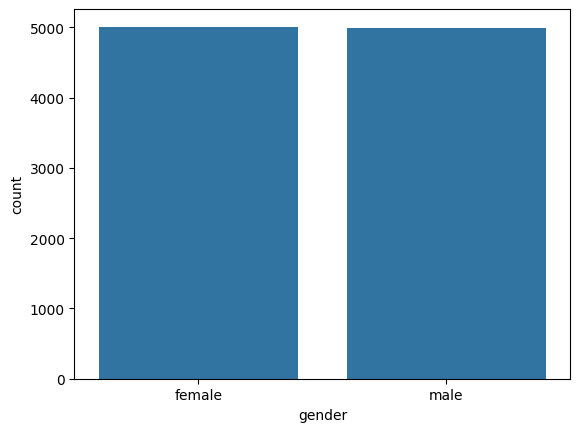

In [22]:
#visualize this as a countplot
sns.countplot(x='gender',data=df)

**Categorical ordered:**

This type of data has a natural rank and progression.
e.g: Education, income

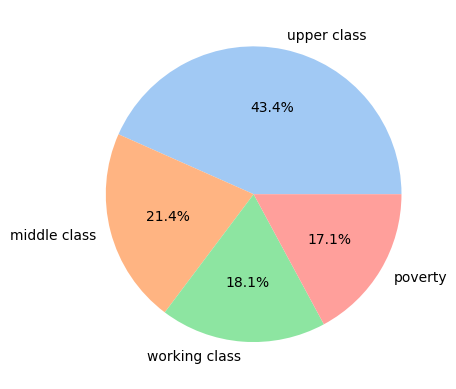

In [25]:
# Lets explore income variable using a pie chart

labels = ['upper class','middle class','working class','poverty']

income_data= df['income'].value_counts()

colors_p = sns.color_palette('pastel')
plt.pie(income_data,labels=labels,colors=colors_p,autopct='%1.1f%%')
plt.show()

The largest ategory is **upper class** representing 43.4% of the total individuals.

Lets check out **Education**

In [26]:
#what sub categories are there in eduction
df['education'].value_counts()

education
high school    4157
university     3928
none           1915
Name: count, dtype: int64

<ipython-input-30-b1c8af28bc3e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education',data=df,order=['university','high school','none'],palette='Set2')


Text(0.5, 1.0, 'Number of Customers per Education Level')

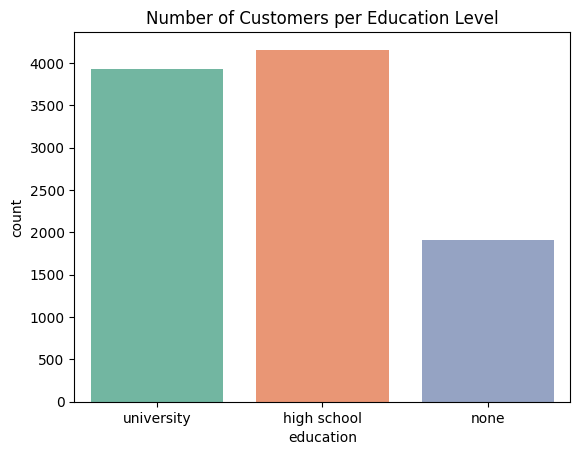

In [30]:
sns.countplot(x='education',data=df,order=['university','high school','none'],palette='Set2')
plt.title('Number of Customers per Education Level')

From here, it is understood, that most clients are with a high school education followed by University education and then clients with no education.

## **Univariate Analysis on Numeric Columns**

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  bool   
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  bool   
 10  children             10000 non-null  bool   
 11  annual_mileage       10000 non-null  int64  
 12  vehicle_type         10000 non-null  object 
 13  speeding_violations  10000 non-null  int64  
 14  DUIs                 10000 non-null  int64  
 15  past_accidents       10000 non-null  

In [32]:
df['credit_score'].describe()

count    10000.000000
mean         0.515247
std          0.134628
min          0.053358
25%          0.421301
50%          0.523659
75%          0.613827
max          0.960819
Name: credit_score, dtype: float64

<Axes: xlabel='credit_score', ylabel='Count'>

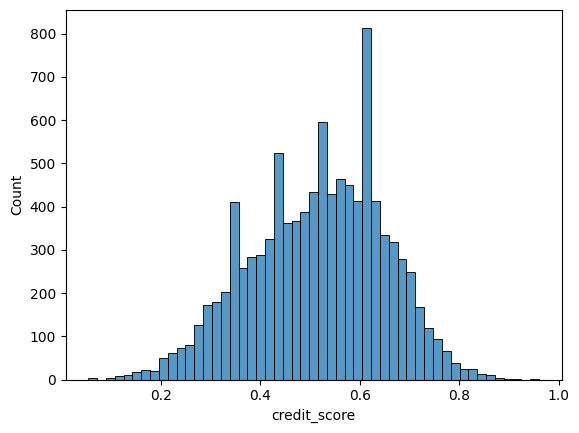

In [33]:
sns.histplot(data=df,x='credit_score')

In [37]:
df.head()

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,annual_mileage,vehicle_type,speeding_violations,DUIs,past_accidents,outcome
0,65+,female,majority,0-9y,high school,upper class,0.629027,True,after 2015,False,True,11697,sedan,0,0,0,False
1,16-25,male,majority,0-9y,none,poverty,0.357757,False,before 2015,False,False,11697,sedan,0,0,0,True
2,16-25,female,majority,0-9y,high school,working class,0.493146,True,before 2015,False,False,11697,sedan,0,0,0,False
3,16-25,male,majority,0-9y,university,working class,0.206013,True,before 2015,False,True,11697,sedan,0,0,0,False
4,26-39,male,majority,10-19y,none,working class,0.388366,True,before 2015,False,False,11697,sedan,2,0,1,True


<Axes: xlabel='annual_mileage', ylabel='Count'>

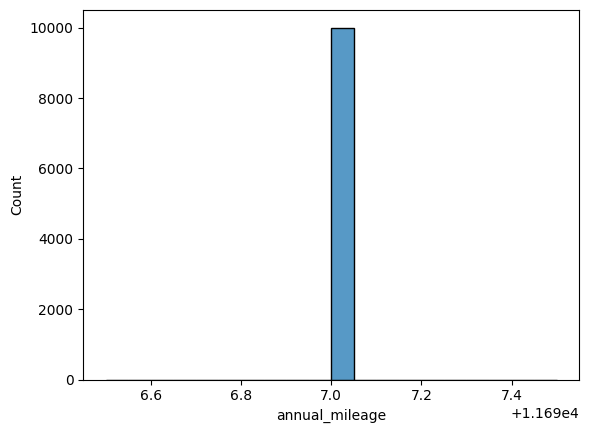

In [36]:
#plot histogram for annual mileage
sns.histplot(data=df,x='annual_mileage',bins=20)

<ipython-input-43-82844cdaff14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='outcome',data=df,palette='Set2')


<Axes: xlabel='outcome', ylabel='count'>

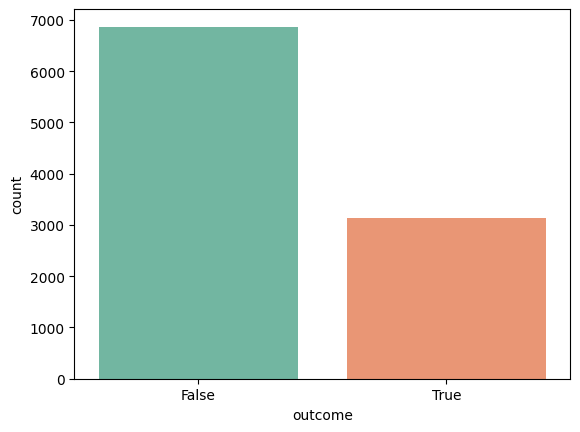

In [43]:
#count of 'Outcome': plot as countplot
sns.countplot(x='outcome',data=df,palette='Set2')

## **Bivariate Analysis**

This helps to understand relationship between two columns and how they affect each other

1. Numeric-Numeric : scatter plot
2. Numeric-Categorical
3. Categoric- categoric

<Axes: xlabel='speeding_violations', ylabel='past_accidents'>

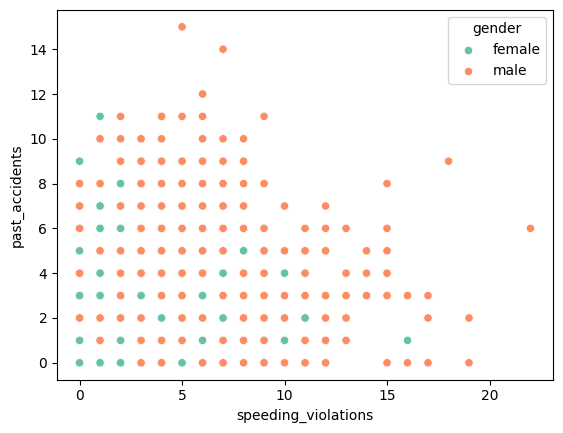

In [38]:
## Numeric to Numeric columns
# understand the relationship between speeding_violations and past_accidents
sns.scatterplot(x='speeding_violations',y='past_accidents',data=df,hue='gender',palette='Set2')

<Axes: xlabel='education', ylabel='credit_score'>

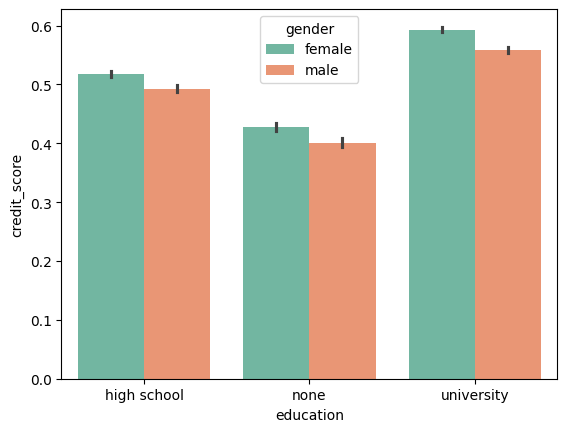

In [40]:
#understanding relationship between education and credit score
sns.barplot(x='education',y='credit_score',data=df,hue='gender',palette='Set2')

<Axes: xlabel='income', ylabel='credit_score'>

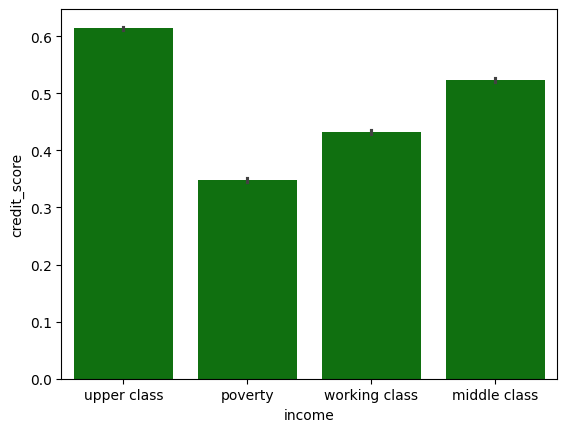

In [42]:
#understanding relationship between income and credit score
sns.barplot(x='income',y='credit_score',data=df,color='green')

<Axes: xlabel='outcome', ylabel='credit_score'>

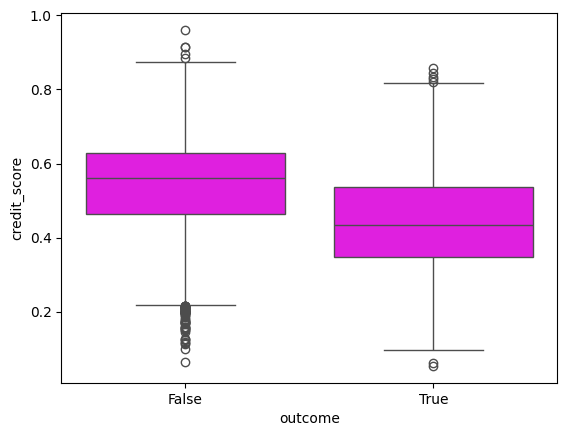

In [45]:
# boxplot for outcome based on credit score
sns.boxplot(x='outcome',y='credit_score',data=df,color='magenta')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  object 
 1   gender               10000 non-null  object 
 2   race                 10000 non-null  object 
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         10000 non-null  float64
 7   vehicle_ownership    10000 non-null  bool   
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  bool   
 10  children             10000 non-null  bool   
 11  annual_mileage       10000 non-null  int64  
 12  vehicle_type         10000 non-null  object 
 13  speeding_violations  10000 non-null  int64  
 14  DUIs                 10000 non-null  int64  
 15  past_accidents       10000 non-null  

In [47]:
# create a new column : claim rate
df['claim_rate'] = np.where(df['outcome']==True,1,0)
df['claim_rate'].value_counts()

claim_rate
0    6867
1    3133
Name: count, dtype: int64

<Axes: xlabel='age', ylabel='claim_rate'>

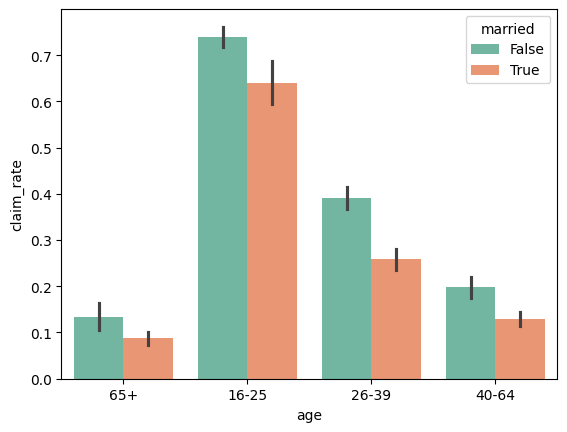

In [53]:
#plot the average claim rate per age group
sns.barplot(x='age',y='claim_rate',hue='married',data=df,palette='Set2')

<ipython-input-49-5d4b925929e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vehicle_year',y='claim_rate',data=df,palette='Set2')


<Axes: xlabel='vehicle_year', ylabel='claim_rate'>

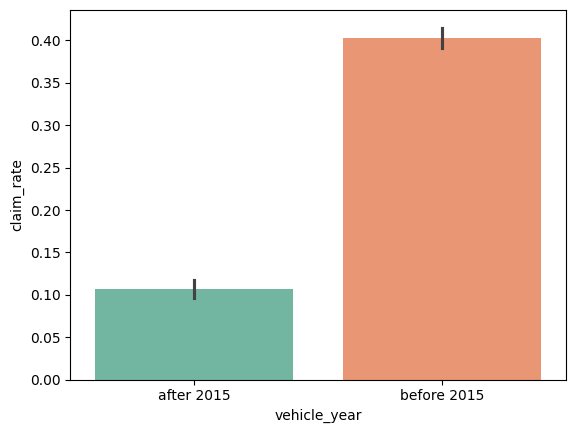

In [49]:
#plot avg claim rate per vehicle year
sns.barplot(x='vehicle_year',y='claim_rate',data=df,palette='Set2')

# **Multivariate Analysis**

1. corr()
2. Heatmap()

```
CORRELATION: -1 to 1
closer to -1 : negative i.e when 1 column increases the other decreases
closer to 1: positive  i.e  when col1 increases, col2 also increases
```



In [51]:
#create a pivot table for education and income with avg claim rate
edu_income = pd.pivot_table(data=df, index='education',columns='income',values='claim_rate',aggfunc='mean')
edu_income

income,middle class,poverty,upper class,working class
education,,,,
high school,0.255396,0.671662,0.118347,0.450736
none,0.209790,0.640895,0.098592,0.394841
university,0.335135,0.649485,0.143167,0.550769


<Axes: xlabel='income', ylabel='education'>

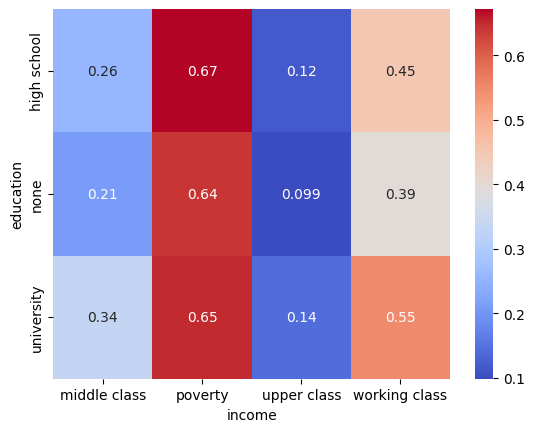

In [52]:
sns.heatmap(edu_income,annot=True,cmap='coolwarm')

In [54]:
# create a pivot table for gender and family status with avg claim rate as values
gender_children=pd.pivot_table(data=df,index='gender',columns='children',values='claim_rate')
gender_children

children,False,True
gender,,
female,0.420476,0.193231
male,0.527261,0.288546


<Axes: xlabel='children', ylabel='gender'>

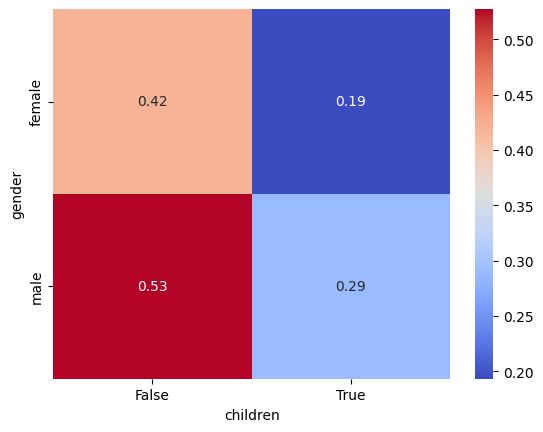

In [55]:
#heatmap to visualize gender, children and claim rate
sns.heatmap(gender_children,annot=True,cmap='coolwarm')